In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

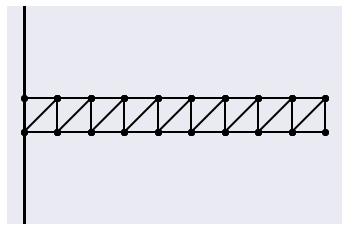

In [23]:
g = 9.81
m = 0.1
n = 20
e = 0.1
l = e
k = 10000


# define first position of the masses
p0 = np.zeros((n, 2))
p0[:, 0] = np.repeat(e*np.arange(n//2), 2)
p0[:, 1] = np.tile((0, -e), n//2) 

# define connectivity matrix between the massess
A = np.eye(n, n, 1) + np.eye(n, n, 2)

# specify the spring stiffness of each spring
L = l * (np.eye(n, n, 1) + np.eye(n, n, 2))
for i in range(n//2-1):
    L[2*i+1, 2*i+2] *= np.sqrt(2)

I, J = np.nonzero(A)

dist = lambda P: np.sqrt(
    (P[:,0] - P[:,0][:, np.newaxis])**2 +
    (P[:,1] - P[:,1][:, np.newaxis])**2
)

def show_bar(P):
    # wall
    plt.axvline(0, color='k', lw=3)
    
    # distance matrix
    D = dist(P)
    
    # we plot the springs
    for i, j in zip(I, J):
        # the color depends on the spring tension
        # which is proportional to the spring elongation
        c = D[i, j] - L[i, j]
        plt.plot(P[[i, j], 0], P[[i, j], 1], lw=2, color=plt.cm.copper(c*150))
    
    # we plot the masses
    plt.plot(P[[I, J], 0], P[[I, J], 1], 'ok',)
    
    # we configure the axes
    plt.axis('equal')
    plt.xlim(P[:, 0].min() - e/2, P[:,0].max() + e/2)
    plt.ylim(P[:, 1].min() - e/2, P[:,1].max() + e/2)
    plt.xticks([])
    plt.yticks([])
        
        
show_bar(p0)
plt.title("initial configuration")

In [17]:
np.tile((0, -e), n//2) 

array([ 0. , -0.1,  0. , -0.1,  0. , -0.1,  0. , -0.1,  0. , -0.1,  0. ,
       -0.1,  0. , -0.1,  0. , -0.1,  0. , -0.1,  0. , -0.1])